<a href="https://colab.research.google.com/github/Fares00T/AI-Algorithms/blob/main/Evolution_Strategies_for_Model_Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Dataset

In [ ]:
# Load data from file
data = np.loadtxt('ES_data_5.dat')
input_data = data[:, 0]  # X values
output_data = data[:, 1]  # Y values


# Step 2: Define the model function

In [ ]:
def model(i, a, b, c):
    return a * i**2 - b * np.cos(c * np.pi * i)

# Step 3: Define the fitness function (Mean Squared Error)

In [ ]:
def mse_value(input_data, output_data, params):
    a, b, c = params
    output_approx = a * (input_data ** 2) - b * np.cos(c * np.pi * input_data)
    return np.mean((output_approx - output_data) ** 2)

# Step 4: Initialize parameters

In [ ]:

pop = 10
N_max = 100
epsilon = 1e-5



Solution: [6.90909218131845, 10.348454093596192, 1.2997021659011387, 0.25777088329785797]
Total time taken: 0.0982 seconds
Number of iterations: 58


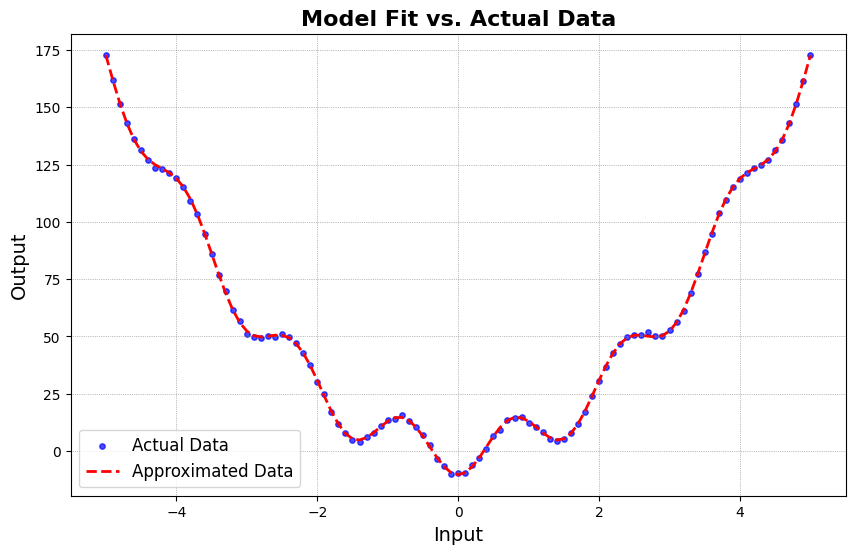

In [ ]:
import time


def evolutionary_strategies(pop, N_max, epsilon, input_data, output_data):

    # Constants for mutation updates
    tau1 = 1 / np.sqrt(2 * 3)
    tau2 = 1 / np.sqrt(2 * np.sqrt(3))

    # Initial population setup
    generation = np.zeros((pop, 7))
    for i in range(pop):
        a, b, c = np.random.uniform(-10, 10, 3)
        sigma_a, sigma_b, sigma_c = np.random.uniform(0, 10, 3)
        MSE = mse_value(input_data, output_data, [a, -b, c])  # Assuming mse_value is defined elsewhere
        generation[i, :] = [a, b, c, sigma_a, sigma_b, sigma_c, MSE]

    best_individual = generation[0, :]

    # Start timing the process
    start_time = time.time()

    # Counter for iterations
    iteration_count = 0

    for _ in range(N_max):
        iteration_count += 1  # Increment iteration count

        offsprings = np.zeros((pop * 5, 7))
        for j in range(pop):
            for k in range(5):
                # Generate new parameters using Gaussian mutation
                a = generation[j, 0] + np.random.randn() * generation[j, 3]
                b = generation[j, 1] + np.random.randn() * generation[j, 4]
                c = generation[j, 2] + np.random.randn() * generation[j, 5]

                # Update strategy parameters
                R1 = np.random.randn() * tau1
                R2 = np.random.randn() * tau2
                sigma_a = generation[j, 3] * np.exp(R1) * np.exp(R2)
                R2 = np.random.randn() * tau2
                sigma_b = generation[j, 4] * np.exp(R1) * np.exp(R2)
                R2 = np.random.randn() * tau2
                sigma_c = generation[j, 5] * np.exp(R1) * np.exp(R2)

                MSE = mse_value(input_data, output_data, [a, b, c])
                offsprings[j * 5 + k, :] = [a, b, c, sigma_a, sigma_b, sigma_c, MSE]

        generation = generation[generation[:, 6].argsort()]
        offsprings = offsprings[offsprings[:, 6].argsort()]

        if abs(generation[0, 6] - offsprings[0, 6]) < epsilon:
            if generation[0, 6] > offsprings[0, 6]:
                best_individual = offsprings[0, :]
            break

        # Keep top individuals as new generation
        generation = offsprings[:pop, :]
        best_individual = generation[0, :]

    # Final MSE calculation and visualization
    MSE = mse_value(input_data, output_data, best_individual[:3])
    output_approximated = best_individual[0] * (input_data ** 2) - best_individual[1] * np.cos(
        best_individual[2] * np.pi * input_data)

    solution = [best_individual[0], best_individual[1], best_individual[2], MSE]

    print("Solution:", solution)

    # End timing
    end_time = time.time()

    # Time taken for the process
    total_time = end_time - start_time
    print(f"Total time taken: {total_time:.4f} seconds")

    # Number of iterations
    print(f"Number of iterations: {iteration_count}")

    # Plotting the results with updated visualization style
    plt.figure(figsize=(10, 6))
    plt.scatter(input_data, output_data, label='Actual Data', color='blue', s=15, marker='o', alpha=0.7)
    plt.plot(input_data, output_approximated, label='Approximated Data', color='red', linewidth=2, linestyle='--')
    plt.title('Model Fit vs. Actual Data', fontsize=16, fontweight='bold')
    plt.xlabel('Input', fontsize=14)
    plt.ylabel('Output', fontsize=14)
    plt.grid(color='gray', linestyle=':', linewidth=0.5)
    plt.legend(fontsize=12, loc='best')
    plt.show()

    return solution

# Assuming mse_value is defined somewhere in your code
# Call the function with appropriate arguments
solution = evolutionary_strategies(pop, N_max, epsilon, input_data, output_data)
